# 在线电商销售平台数据分析
项目是有数据有15列，327047行的电商销售平台数据, 需要进行销售数据分析, 来给出相应的建议和对策

- 用户类别分析
- 管理人员的排名分析
- 商品销售额和数量的管理
- 零售商品退货率
- 城市的销售分析
- 区域的销售分析


## 分析思路
![Image Name](https://cdn.kesci.com/upload/image/rdkbyfku9j.png?imageView2/0/w/960/h/960)


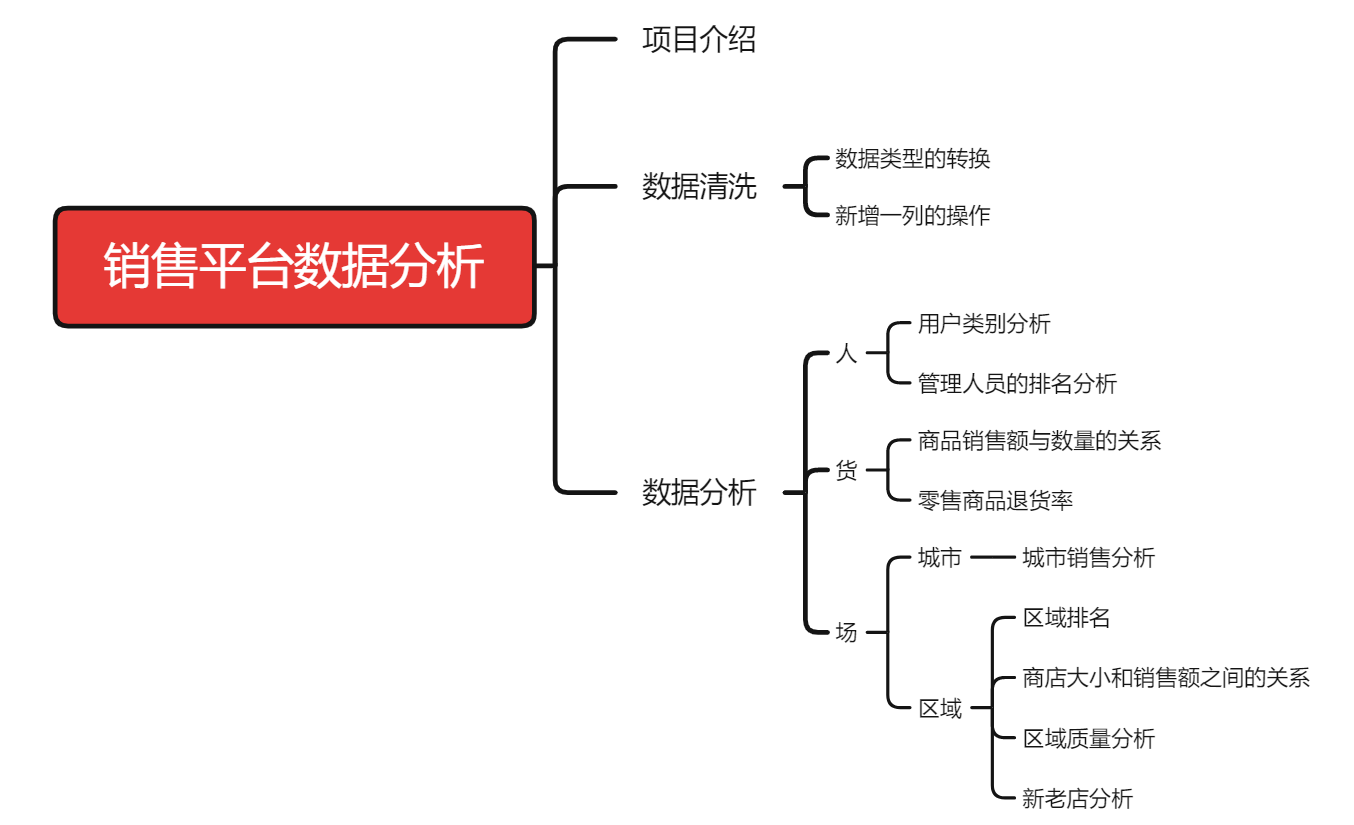

## 数据清洗

In [1]:
# 导入相关工具
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  #  可以省略plt.show()

UsageError: unrecognized arguments: # 可以省略plt.show()


In [2]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #允许显示负数

In [3]:
xs = pd.read_excel(r"/home/mw/input/data6645/Analysis.xlsx")
xs.info() #  详细信息 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327047 entries, 0 to 327046
Data columns (total 15 columns):
MonthID                       327047 non-null int64
ItemID                        327047 non-null int64
LocationID                    327047 non-null int64
Sum_GrossMarginAmount         327047 non-null float64
Sum_Regular_Sales_Dollars     327047 non-null float64
Sum_Markdown_Sales_Dollars    327047 non-null float64
Sum_Regular_Sales_Units       327047 non-null int64
Sum_Markdown_Sales_Units      327047 non-null int64
Category                      327047 non-null object
Buyer                         327047 non-null object
Territory                     327047 non-null object
DM                            327047 non-null object
City Name                     327047 non-null object
SellingAreaSize               327047 non-null int64
Store Type                    327047 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 37.4+ MB


 数据有15列，327047行，没有空值  
 


![Image Name](https://cdn.kesci.com/upload/image/rdkc12hjwx.png?imageView2/0/w/960/h/960)


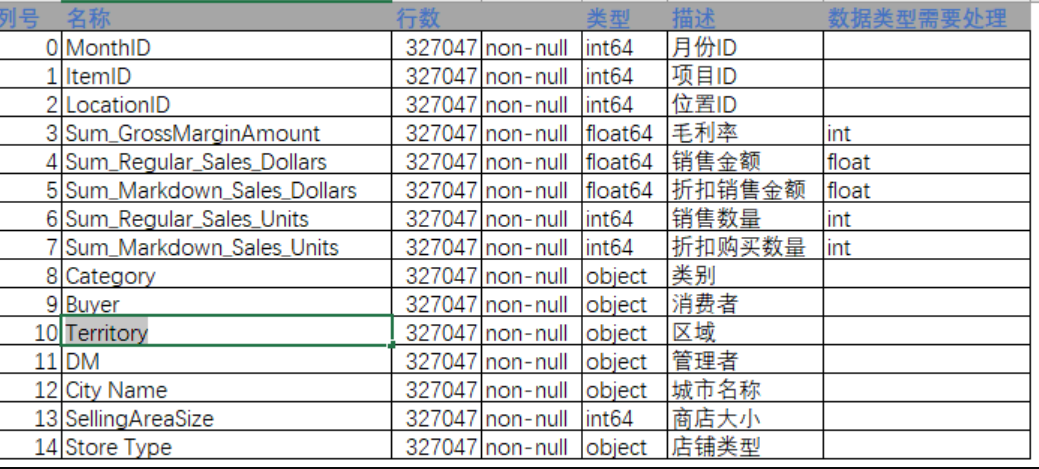

In [4]:
xs.head()  # 取前5行数据  

,MonthID,ItemID,LocationID,Sum_GrossMarginAmount,Sum_Regular_Sales_Dollars,Sum_Markdown_Sales_Dollars,Sum_Regular_Sales_Units,Sum_Markdown_Sales_Units,Category,Buyer,Territory,DM,City Name,SellingAreaSize,Store Type
0,201401,195145,19,4.99,9.99,0.0,1,0,090-Home,"Nelson, Leandra",MD,Valery Ushakov,Abingdon,50000,Same Store
1,201401,227998,3,4.99,9.99,0.0,1,0,090-Home,"Nelson, Leandra",WV,Tina Lassila,Beckley,40000,Same Store
2,201401,227998,34,4.99,9.99,0.0,1,0,090-Home,"Nelson, Leandra",PA,Andrew Ma,Monroeville,40000,New Store
3,201401,227998,551,4.99,9.99,0.0,1,0,090-Home,"Nelson, Leandra",SC,Brad Sutton,Anderson,20000,Same Store
4,201401,236872,563,4.99,9.99,0.0,1,0,040-Juniors,"Hubbard, Quintessa",GA,Annelie Zubar,Duluth,15000,Same Store


### 数据类型的转化

In [5]:
# MonthID,itemID,LocationID 需要修改数据类型.
xs['ItemID'] = xs['ItemID'].apply(str)
xs['LocationID'] = xs['LocationID'].apply(str)

In [6]:
# 新添加列Month，方便按月进行统计
xs['MonthID'] = pd.to_datetime(xs['MonthID'],format="%Y%m")
xs['Month'] = xs['MonthID'].dt.year.astype(int)

In [7]:
# 各个指标的数据类型的转化
xs['Sum_GrossMarginAmount']=pd.to_numeric(xs['Sum_GrossMarginAmount'], errors='coerce').fillna(0) 
xs['Sum_Regular_Sales_Dollars']=pd.to_numeric(xs['Sum_Regular_Sales_Dollars'], errors='coerce').fillna(0)
xs['Sum_Markdown_Sales_Dollars']=pd.to_numeric(xs['Sum_Markdown_Sales_Dollars'], errors='coerce').fillna(0)
xs['Sum_Regular_Sales_Units']=pd.to_numeric(xs['Sum_Regular_Sales_Units'], errors='coerce').fillna(0)
xs['Sum_Markdown_Sales_Units']=pd.to_numeric(xs['Sum_Markdown_Sales_Units'], errors='coerce').fillna(0)
xs['SellingAreaSize']=pd.to_numeric(xs['SellingAreaSize'], errors='coerce').fillna(0)

In [8]:
# 只取相应的指标进行描述性分析
xs[['Sum_GrossMarginAmount','Sum_Regular_Sales_Dollars','Sum_Markdown_Sales_Dollars','Sum_Regular_Sales_Units','Sum_Markdown_Sales_Units']].describe()

,Sum_GrossMarginAmount,Sum_Regular_Sales_Dollars,Sum_Markdown_Sales_Dollars,Sum_Regular_Sales_Units,Sum_Markdown_Sales_Units
count,327047.00000,327047.000000,327047.000000,327047.000000,327047.000000
mean,19.09558,42.465872,5.012725,7.826893,1.200311
std,45.03656,83.751959,16.180980,32.709923,3.816069
min,-5250.00000,-299.990000,-164.010000,-29.000000,-5.000000
25%,0.75000,0.000000,0.000000,0.000000,0.000000
50%,6.98000,14.990000,0.000000,3.000000,0.000000
75%,23.88000,49.400000,3.000000,8.000000,1.000000
max,3357.43000,5661.970000,1008.980000,4286.000000,738.000000


- 销售价格和数量中都有负数，估计应该是退货，可以统计一些退货的情况


In [9]:
# 直方图 客户消费情况分布
plt.figure(figsize=(10, 8))  # 创建画布,用于置放子图

plt.subplot(221)  # 整体的客户消费情况分布
plt.title('客户整体消费情况分布')
xs['Sum_Regular_Sales_Dollars'].hist(bins=100, color='c')

plt.subplot(222)  #  销售金额小于1000的分布情况
plt.title('客户消费金额小于1000的分布')
xs[xs['Sum_Regular_Sales_Dollars'] < 1000]['Sum_Regular_Sales_Dollars'].hist(
    bins=10, color='c')

plt.subplot(223)  # 销售金额大于2000的分布情况
plt.title('客户消费金额大于2000的分布')
xs[xs['Sum_Regular_Sales_Dollars'] > 2000]['Sum_Regular_Sales_Dollars'].hist(
    bins=10, color='c')

plt.subplot(224)  #  退单的金额分布情况
plt.title('客户退单的金额分布情况')
xs[xs['Sum_Regular_Sales_Dollars'] < 0]['Sum_Regular_Sales_Dollars'].hist(
    bins=10, color='c')

<Figure size 720x576 with 4 Axes>

- 销售价格大部分在1000以内

- 取1000以内的数据分布大概都在400以内了

- 退单的金额大都在-100以内

- 大单的分布在2000-3500之前，3500 之后又极值

In [10]:
xs[xs['Sum_Regular_Sales_Dollars']>3500]

,MonthID,ItemID,LocationID,Sum_GrossMarginAmount,Sum_Regular_Sales_Dollars,Sum_Markdown_Sales_Dollars,Sum_Regular_Sales_Units,Sum_Markdown_Sales_Units,Category,Buyer,Territory,DM,City Name,SellingAreaSize,Store Type,Month
218391,2014-01-01,183620,26,3357.43,5661.97,0.0,59,0,090-Home,"Garcia, Jeremy",OH,Carlos Grilo,Akron,55000,Same Store,2014


- 查看一下极值，根据实际情况分析一下

## 三维分析-人(用户和员工)
用户质量分析
通过二八原则，去寻找关键的那20%决定性因素！

- 分析大客户2/8原则找出最有生产力的客户

- 分析员工，看那些员工最有战斗力

- 分析用户的类别，看那些类别客户产出多。

In [11]:
# 计算高质量用户贡献了多少金额(28倾向）
user_amount = xs.groupby('Buyer')['Sum_Regular_Sales_Dollars'].sum().sort_values(ascending=False).reset_index()  #  df形式 
user_amount['amount_cumsum'] = user_amount['Sum_Regular_Sales_Dollars'].cumsum() # 累计销售额
amount_total = user_amount['amount_cumsum'].max()
# 新增一列percentage
user_amount['percentage'] = user_amount['amount_cumsum'] / amount_total
#统计销量
user_count = xs.groupby('Buyer')['Sum_Regular_Sales_Units'].sum().sort_values(ascending=False).reset_index()
user_count['count_cumsum'] = user_count['Sum_Regular_Sales_Units'].cumsum()
count_total = user_count['count_cumsum'].max()
user_count['percentage'] = user_count['count_cumsum'] / count_total

In [12]:

#画图
plt.figure(figsize=(10, 8))  # 创建画布,用于置放子图
plt.tick_params(labelsize=14)

plt.subplot(221)
plt.title('零售消费额占比')
plt.ylabel("累计比率")
plt.plot(user_amount['percentage'])
plt.tick_params(labelsize=14)
plt.grid(color='grey', linestyle='--', linewidth=1, alpha=0.6)

plt.subplot(222)
plt.title('零售销量占比')
plt.ylabel("累计比率")
plt.plot(user_count['percentage'])
plt.tick_params(labelsize=14)
plt.grid(color='grey', linestyle='--', linewidth=1, alpha=0.6)
plt.show()

user_amount.head(20) 

<Figure size 720x576 with 2 Axes>

,Buyer,Sum_Regular_Sales_Dollars,amount_cumsum,percentage
0,"Mendez, Jerry",1429382.16,1429382.16,0.102920
1,"Buchanan, Alma",1279523.22,2708905.38,0.195049
2,"Wood, Jana",1069338.76,3778244.14,0.272044
3,"Nelson, Leandra",876405.92,4654650.06,0.335148
4,"Perkins, Thor",832592.15,5487242.21,0.395097
5,"Ward, Kermit",798465.47,6285707.68,0.452589
6,"Mckenzie, Aphrodite",794742.81,7080450.49,0.509813
7,"Robertson, Lillith",777150.47,7857600.96,0.565770
8,"Rodriguez, Calista",770210.29,8627811.25,0.621227
9,"Watson, Skyler",553239.53,9181050.78,0.661062


### 用户类别分析
用户类别分析，**看各类别用户占比分别为多少，针对不同类别推出不同的方案，提升销售额。**

In [14]:
#用户类别分析
plt.figure(figsize=(12, 10))  # 创建画布,用于置放子图


category = xs.groupby('Category')['Sum_Regular_Sales_Dollars'].sum(
) / xs.Sum_Regular_Sales_Dollars.sum()
category.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('零售分类金额占比')




Text(0.5, 1.0, '零售分类金额占比')

<Figure size 864x720 with 1 Axes>

- mens 是最多的  groceries 卖的金额的是最少的 

In [18]:
plt.figure(figsize=(10, 8))  # 创建画布,用于置放子图
category = xs.groupby('Category').Sum_Regular_Sales_Units.sum(
) / xs.Sum_Regular_Sales_Units.sum()
category.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('零售分类数量占比')

Text(0.5, 1.0, '零售分类数量占比')

<Figure size 720x576 with 1 Axes>

In [19]:
plt.figure(figsize=(10, 8))  # 创建画布,用于置放子图
category = xs.groupby('Category').Sum_Markdown_Sales_Dollars.sum(
) / xs.Sum_Markdown_Sales_Dollars.sum()
category.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('零售分类折扣金额占比')

plt.show()

<Figure size 720x576 with 1 Axes>

- 观察图可以看出,零售分类中的mens,kids,juniors ,shoes 份额占据59.7%份额. 
- 折扣分类图中 mens 是最多的 , groceries 是最少的 . 
- 占大头的各分类在两图中都没有很大区别, 只有womens 在折扣分类中差不多是零售的两倍, **初步判断,如果需要吸引女性顾客,可以多开展一些打折活动**.
- 类别中金额卖的最多的是020-Mens，050-shoes，040-Juniors，030-kids，  跟 类别销售数量最多的不一样，找找原因，重点推荐金额占比高的



### DM(管理者)排名分析

In [42]:
order_DM = xs.groupby('DM')['Sum_Regular_Sales_Dollars'].sum().sort_values()

order_DM.plot.barh()

plt.title("管理者销售排名")
#字体设置14号
plt.tick_params(labelsize=14)

plt.show()

<Figure size 432x288 with 1 Axes>

## 三维分析-货(商品分析)
###  商品销售额与数量的关系

In [43]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(x='Sum_Regular_Sales_Dollars', # xs['Sum_Regular_Sales_Dollars']
            y='Sum_Regular_Sales_Units',
            data=xs)
plt.tick_params(labelsize=14)
plt.xlabel('商品销售金额')
plt.ylabel('商品销售数量')
plt.title('销售金额和数量之间的关系')


plt.subplot(122)
plt.scatter(x='Sum_Markdown_Sales_Dollars',
            y='Sum_Markdown_Sales_Units',
            data=xs)
plt.tick_params(labelsize=14)
plt.xlabel('商品折扣销售金额')
plt.ylabel('商品折扣销售数量')
plt.title('商品打折销售金额与数量的关系')
plt.show()

<Figure size 864x288 with 2 Axes>

观察散点图各点的分布发现呈现一个高度的集中，零散几个极值，符合零售行业规律，相比而言折扣消费的分布更具规律，初步估计这家店应该是按照金额数或者订单数进行一个折扣销售。
- 处理一下极值

In [44]:
xs[xs['Sum_Regular_Sales_Dollars']<2000].plot.scatter(x='Sum_Regular_Sales_Dollars',y='Sum_Regular_Sales_Units',c = "b")
plt.xlabel('每笔零售订单消费金额')
plt.ylabel('每笔零售订单购买数量')
plt.title('销售金额和数量之间的关系')
plt.show()

<Figure size 432x288 with 1 Axes>

In [45]:
xs[xs['Sum_Markdown_Sales_Dollars'] < 600 ].plot.scatter(x='Sum_Markdown_Sales_Dollars',y='Sum_Markdown_Sales_Units',c = "g")
plt.xlabel('每笔零售订单消费金额')
plt.ylabel('每笔零售订单购买数量')
plt.title('销售金额和数量之间的关系')
plt.show()

<Figure size 432x288 with 1 Axes>

-  价格和销售数量规律性增长

### 零售商品退货率

In [46]:
# 商品退货销售额占比
xs[xs['Sum_Regular_Sales_Dollars']<0]['Sum_Regular_Sales_Dollars'].sum()/xs['Sum_Regular_Sales_Dollars'].sum()*(-100)

0.5476993709296869

In [47]:
# 商品打折后退货销售额占比
xs[xs['Sum_Markdown_Sales_Dollars']<0]['Sum_Markdown_Sales_Dollars'].sum()/xs['Sum_Markdown_Sales_Dollars'].sum()*(-100)

0.2527765043927772

产品的加起来退货率不足1%，在能接受的范围以内，没有前后的一个退货率进行一个对比，有对比的话更能做好总结。
- 退货销售额在销售额，打折销售销售额占比不足1%

## 三维分析-场(区域分析)
### 城市
- 城市销售前十

In [48]:
#各城市零售销售排名前十
xs.groupby('City Name')['Sum_Regular_Sales_Dollars'].sum().sort_values().head(10).plot.barh()
plt.tick_params(labelsize=14)

<Figure size 432x288 with 1 Axes>

In [49]:
#各城市折扣销售排名前十
xs.groupby('City Name')['Sum_Markdown_Sales_Dollars'].sum().sort_values().head(10).plot.barh()
plt.tick_params(labelsize=14)

<Figure size 432x288 with 1 Axes>

In [50]:
#各城市零售退货率排名前十的城市
fail=xs[xs['Sum_Regular_Sales_Dollars']<0].groupby('City Name')['Sum_Regular_Sales_Dollars'].sum()/xs['Sum_Regular_Sales_Dollars'].sum()*(-100)
fail.sort_values().head(10).plot.barh()

plt.tick_params(labelsize=14)

<Figure size 432x288 with 1 Axes>

In [51]:
#各城市折扣退货率排名前十的城市
fail1=xs[xs['Sum_Markdown_Sales_Dollars']<0].groupby('City Name')['Sum_Markdown_Sales_Dollars'].sum()/xs['Sum_Markdown_Sales_Dollars'].sum()*(-100)
fail1.sort_values().head(10).plot.barh()

plt.tick_params(labelsize=14)

<Figure size 432x288 with 1 Axes>

### 区域
#### 区域排名

In [52]:
#区域零售销售排名
xs.groupby('Territory')['Sum_Regular_Sales_Dollars'].sum().sort_values().plot.barh()

plt.tick_params(labelsize=14)

<Figure size 432x288 with 1 Axes>

In [53]:
#区域折扣销售排名
xs.groupby('Territory')['Sum_Markdown_Sales_Dollars'].sum().sort_values().plot.barh()
plt.tick_params(labelsize=14)

<Figure size 432x288 with 1 Axes>

折扣销售跟零售销售的排名区域是一模一样的,说明零售销售多的同时 ,折扣销售额也很多,相关性很强

#### 商店大小与销售额

In [54]:
#区域大小与零售销售额
data = xs.groupby('SellingAreaSize')['Sum_Regular_Sales_Dollars'].sum().sort_values(ascending=False)

In [55]:
data

SellingAreaSize
55000    3.167686e+06
10000    3.095392e+06
40000    2.407850e+06
50000    2.063435e+06
15000    1.097037e+06
45000    9.949554e+05
60000    5.888869e+05
65000    3.956744e+05
20000    7.741912e+04
Name: Sum_Regular_Sales_Dollars, dtype: float64

In [56]:
plt.figure(figsize=(12, 4))

plt.scatter(x=data.index,
            y=data.values)
plt.tick_params(labelsize=14)
plt.xlabel('商店的大小')
plt.ylabel('商品销售金额')
plt.title('商店大小和销售额之间的关系')

Text(0.5, 1.0, '商店大小和销售额之间的关系')

<Figure size 864x288 with 1 Axes>

 - 商店尺寸的大小和销量关系不明显。

In [57]:
#区域大小与折扣销售额
xs.groupby('SellingAreaSize')['Sum_Markdown_Sales_Dollars'].sum().sort_values(ascending=False)

SellingAreaSize
10000    422878.65
55000    337513.41
40000    264170.47
50000    235757.76
15000    138427.22
45000    120325.25
60000     72459.06
65000     38848.00
20000      9017.01
Name: Sum_Markdown_Sales_Dollars, dtype: float64

销售额跟商店大小没有很明显的相关关系，猜想对销售影响更多的可能是区域

#### 区域质量分析

In [58]:
# 计算高质量区域用户贡献了多少份额(28倾向）

# 销售金额
territory_amount = xs.groupby('Territory')['Sum_Regular_Sales_Dollars'].sum().sort_values(ascending=False).reset_index()
territory_amount['amount_cumsum'] = territory_amount['Sum_Regular_Sales_Dollars'].cumsum()
amount_total = territory_amount['amount_cumsum'].max()
territory_amount['percentage'] = territory_amount['amount_cumsum'] / amount_total
# 折扣金额
territory_amount = xs.groupby('Territory')['Sum_Markdown_Sales_Dollars'].sum().sort_values(ascending=False).reset_index()
territory_amount['amount_cumsum'] = territory_amount['Sum_Markdown_Sales_Dollars'].cumsum()
amount_total = territory_amount['amount_cumsum'].max()
territory_amount['percentage'] = territory_amount['amount_cumsum'] / amount_total


In [59]:

#画图

plt.subplot(221)
plt.title('区域消费额占比')
plt.ylabel("累计比率")
plt.plot(territory_amount['percentage'])

plt.grid(color='grey', linestyle='--', linewidth=1, alpha=0.6)



plt.subplot(222)
plt.title('区域折扣消费额占比')
plt.ylabel("累计比率")
plt.plot(territory_amount['percentage'])

plt.grid(color='grey', linestyle='--', linewidth=1, alpha=0.6)


<Figure size 432x288 with 2 Axes>

In [60]:
territory_amount.head(20) 

,Territory,Sum_Markdown_Sales_Dollars,amount_cumsum,percentage
0,OH,393440.34,393440.34,0.239991
1,PA,344753.08,738193.42,0.450284
2,WV,248190.39,986383.81,0.601675
3,NC,199244.73,1185628.54,0.723210
4,MD,131557.89,1317186.43,0.803458
5,VA,113754.13,1430940.56,0.872846
6,GA,62458.11,1493398.67,0.910944
7,SC,51718.04,1545116.71,0.942491
8,KY,44361.06,1589477.77,0.969550
9,TN,34348.04,1623825.81,0.990502


结合图表可知：五个区域左右贡献了80%以上的销售额，还有很多区域市场等待开发，后续可关注一下高质量区域是否市场饱和。

#### 新老店分析

In [61]:

#新老店分析
fig1 = plt.subplot(131)
category=xs.groupby('Store Type').Sum_Regular_Sales_Dollars.sum()/xs.Sum_Regular_Sales_Dollars.sum()
category.plot.pie(figsize=(12,10),autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('新老店销售额占比')


fig2 = plt.subplot(133)
category=xs.groupby('Store Type').Sum_Markdown_Sales_Dollars.sum()/xs.Sum_Markdown_Sales_Dollars.sum()
category.plot.pie(figsize=(12,10),autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('新老店折扣销售额占比')



Text(0.5, 1.0, '新老店折扣销售额占比')

<Figure size 864x720 with 2 Axes>

In [62]:
#新老店的退货率
fail1=xs[xs['Sum_Markdown_Sales_Dollars']<0].groupby('Store Type')['Sum_Markdown_Sales_Dollars'].sum()/xs['Sum_Markdown_Sales_Dollars'].sum()*(-100)
fail1.sort_values(ascending=False)

Store Type
Same Store    0.239174
New Store     0.013603
Name: Sum_Markdown_Sales_Dollars, dtype: float64

- 新店的销售占比很小，可以大力开发一下新店的价值。
- 新老店的退货率中，老店退货率显然更高，找一下原因，提升服务，增加粘性，思考打优质服务战还是高性价比产品。